<a href="https://colab.research.google.com/github/hvmdvvn/Pytorch-Projects/blob/main/Rice_Type_Classification_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import kagglehub
import pandas as pd
import os

# Download dataset (returns local folder path)
path = kagglehub.dataset_download("mssmartypants/rice-type-classification")

print(path)
print(os.listdir(path))

100%|██████████| 888k/888k [00:00<00:00, 965kB/s]

Extracting files...
/root/.cache/kagglehub/datasets/mssmartypants/rice-type-classification/versions/2
['riceClassification.csv']


In [3]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader
from torchsummary import summary
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [4]:
csv_path = os.path.join(path, "riceClassification.csv")
df = pd.read_csv(csv_path)

df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [5]:
df.dropna(inplace=True)
df.drop(['id'], axis=1, inplace=True)
print(df.shape)

(18185, 11)


In [6]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [7]:
print(df['Class'].unique())

[1 0]


In [8]:
print(df['Class'].value_counts())

Class
1    9985
0    8200
Name: count, dtype: int64


In [9]:
original_df = df.copy()

In [10]:
for col in df.columns: # Normalization
  df[col]= df[col]/df[col].abs().max()

df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,0.444368,0.503404,0.775435,0.744658,0.424873,0.666610,0.741661,0.537029,0.844997,0.368316,1.0
1,0.281293,0.407681,0.622653,0.750489,0.273892,0.530370,0.804230,0.409661,0.919215,0.371471,1.0
2,0.298531,0.416421,0.630442,0.756341,0.284520,0.546380,0.856278,0.412994,0.959862,0.374747,1.0
3,0.300979,0.420463,0.629049,0.764024,0.286791,0.548616,0.883772,0.414262,0.961818,0.379222,1.0
4,0.361704,0.464626,0.682901,0.775033,0.345385,0.601418,0.867808,0.452954,0.966836,0.386007,1.0


In [11]:
X = np.array(df.iloc[:, :-1])
Y = np.array(df.iloc[:, -1])

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [13]:
X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size=0.5)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(12729, 10)
(2728, 10)
(2728, 10)


In [15]:
class dataset(Dataset):
  def __init__(self, X, Y):
    self.X = torch.tensor(X, dtype=torch.float32).to(device)
    self.Y = torch.tensor(Y, dtype=torch.float32).to(device)

  def __len__(self):
    return len(self.X)

  def __getitem__(self, index):
    return self.X[index], self.Y[index]

In [16]:
training_data = dataset(X_train, Y_train)
validation_data = dataset(X_val, Y_val)
testing_data = dataset(X_test, Y_test)

In [17]:
train_dataloader = DataLoader(training_data, batch_size=8, shuffle=True)
validation_dataloader = DataLoader(validation_data, batch_size=8, shuffle=True)
testing_dataloader = DataLoader(testing_data, batch_size=8, shuffle=True)

In [18]:
for x, y in train_dataloader:
  print(x)
  print("=====")
  print(y)
  break

tensor([[0.8079, 0.8353, 0.8428, 0.9213, 0.7684, 0.8989, 0.6371, 0.7163, 0.8636,
         0.5623],
        [0.6292, 0.8292, 0.6605, 0.9655, 0.6001, 0.7932, 0.5385, 0.6901, 0.7246,
         0.7123],
        [0.8299, 0.8668, 0.8308, 0.9329, 0.7860, 0.9110, 0.7048, 0.7336, 0.8456,
         0.5919],
        [0.7131, 0.7801, 0.7983, 0.9179, 0.6741, 0.8445, 0.6867, 0.6723, 0.8652,
         0.5544],
        [0.9186, 0.9232, 0.8704, 0.9364, 0.8741, 0.9584, 0.8385, 0.7826, 0.8226,
         0.6018],
        [0.8945, 0.8813, 0.8769, 0.9246, 0.8557, 0.9458, 0.6813, 0.8130, 0.7422,
         0.5702],
        [0.8475, 0.8364, 0.8864, 0.9088, 0.8111, 0.9206, 0.7161, 0.7352, 0.8599,
         0.5353],
        [0.6376, 0.8500, 0.6581, 0.9694, 0.6060, 0.7985, 0.5389, 0.6892, 0.7361,
         0.7328]], device='cuda:0')
=====
tensor([0., 1., 0., 0., 0., 0., 0., 1.], device='cuda:0')


In [36]:
HIDDEN_NEURONS = 10

class MyModel(nn.Module):
  def __init__(self):
    super(MyModel, self).__init__()

    self.input_layer = nn.Linear(X.shape[1], HIDDEN_NEURONS)
    self.linear = nn.Linear(HIDDEN_NEURONS, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    x = self.input_layer(x)
    x = self.linear(x)
    x = self.sigmoid(x)

    return x

model = MyModel().to(device)

In [37]:
summary(model, (X.shape[1],)) #-1 batch size

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 10]             110
            Linear-2                    [-1, 1]              11
           Sigmoid-3                    [-1, 1]               0
Total params: 121
Trainable params: 121
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [38]:
criterion = nn.BCELoss()
optimizer = Adam(model.parameters(), lr=0.001)

In [39]:
total_loss_train_plot = []
total_loss_validation_plot = []
total_acc_train_plot = []
total_acc_validation_plot = []

epochs = 10

for epoch in range(epochs):
  total_acc_train = 0
  total_loss_train = 0
  total_acc_validation = 0
  total_loss_validation = 0

  for data in train_dataloader:
    inputs, labels = data

    prediction = model(inputs).squeeze(1)
    # print(prediction.shape) # (8, 1)
    # print(prediction.squeeze(1).shape) # (8)

    batch_loss = criterion(prediction, labels)
    total_loss_train += batch_loss.item()

    acc = ((prediction).round() == labels).sum().item()
    total_acc_train += acc

    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()

  # Validation
  with torch.no_grad():
    for data in validation_dataloader:
      inputs, labels = data

      prediction = model(inputs).squeeze(1)

      batch_loss = criterion(prediction, labels)
      total_loss_validation += batch_loss.item()

      acc = ((prediction).round() == labels).sum().item()
      total_acc_validation += acc

  total_loss_train_plot.append(round(total_loss_train/1000, 4))
  total_loss_validation_plot.append(round(total_loss_validation/1000, 4))

  total_acc_train_plot.append(round(total_acc_train/training_data.__len__() * 100, 4))
  total_acc_validation_plot.append(round(total_acc_validation/validation_data.__len__() * 100, 4))

  print(f'''
  Epoch No. {epoch+1},
  Train Loss: {round(total_loss_train/1000, 4)},
  Train Accuracy: {round(total_acc_train/training_data.__len__() * 100, 4)}.
  Validation Loss: {round(total_loss_validation/1000, 4)},
  Validation Accuracy: {round(total_acc_validation/validation_data.__len__() * 100, 4)}
        ''')
  print('='*25)



  Epoch No. 1, 
  Train Loss: 0.5696, 
  Train Accuracy: 92.3482.
  Validation Loss: 0.0391,
  Validation Accuracy: 98.0205
        

  Epoch No. 2, 
  Train Loss: 0.125, 
  Train Accuracy: 98.5231.
  Validation Loss: 0.0193,
  Validation Accuracy: 98.717
        

  Epoch No. 3, 
  Train Loss: 0.0824, 
  Train Accuracy: 98.5152.
  Validation Loss: 0.0156,
  Validation Accuracy: 98.8636
        

  Epoch No. 4, 
  Train Loss: 0.0714, 
  Train Accuracy: 98.6016.
  Validation Loss: 0.015,
  Validation Accuracy: 98.827
        

  Epoch No. 5, 
  Train Loss: 0.0679, 
  Train Accuracy: 98.5702.
  Validation Loss: 0.0144,
  Validation Accuracy: 98.827
        

  Epoch No. 6, 
  Train Loss: 0.0663, 
  Train Accuracy: 98.5938.
  Validation Loss: 0.0139,
  Validation Accuracy: 98.7903
        

  Epoch No. 7, 
  Train Loss: 0.0648, 
  Train Accuracy: 98.6566.
  Validation Loss: 0.0143,
  Validation Accuracy: 98.6804
        

  Epoch No. 8, 
  Train Loss: 0.0671, 
  Train Accuracy: 98.6016.


In [26]:
acc = ((prediction).round() == labels)
acc

tensor([ True,  True,  True,  True,  True, False,  True,  True],
       device='cuda:0')

In [27]:
acc.sum()

tensor(7, device='cuda:0')

In [28]:
acc.sum().item()

7

In [40]:
with torch.no_grad():
  total_loss_test = 0
  total_acc_test = 0

  for data in testing_dataloader:
    inputs, labels = data

    prediction = model(inputs).squeeze(1)

    batch_loss = criterion(prediction, labels)
    total_loss_test += batch_loss.item()

    acc = ((prediction).round() == labels).sum().item()
    total_acc_test += acc


print(f"Accuracy: {round(total_acc_test/testing_data.__len__() * 100, 4)}")

Accuracy: 98.4604


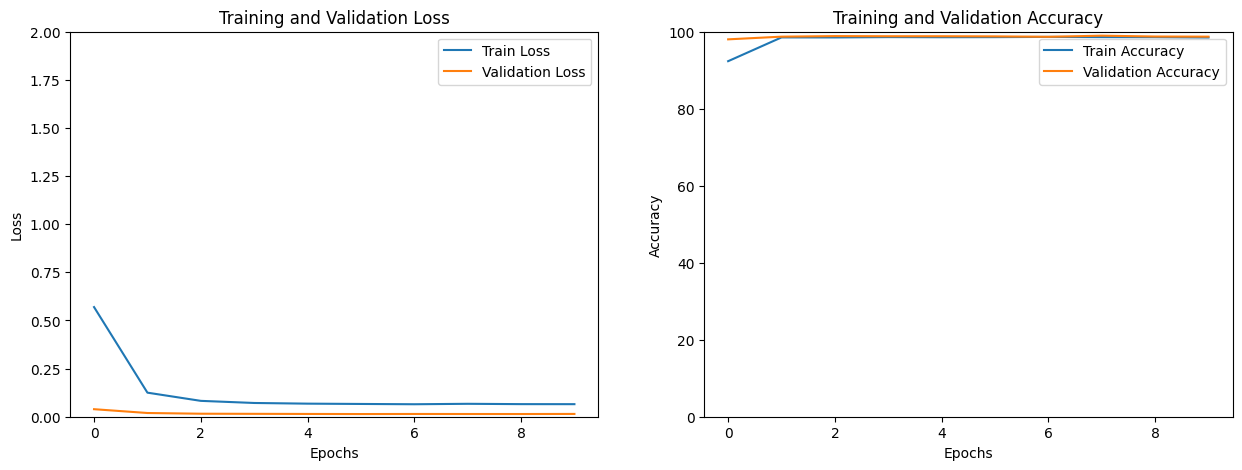

In [41]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

axs[0].plot(total_loss_train_plot, label = 'Train Loss')
axs[0].plot(total_loss_validation_plot, label = 'Validation Loss')
axs[0].set_title("Training and Validation Loss")
axs[0].set_xlabel("Epochs")
axs[0].set_ylabel("Loss")
axs[0].set_ylim([0, 2])
axs[0].legend()

axs[1].plot(total_acc_train_plot, label = 'Train Accuracy')
axs[1].plot(total_acc_validation_plot, label = 'Validation Accuracy')
axs[1].set_title("Training and Validation Accuracy")
axs[1].set_xlabel("Epochs")
axs[1].set_ylabel("Accuracy")
axs[1].set_ylim([0, 100])
axs[1].legend()

plt.show()

In [43]:
original_df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [47]:
area = 4567/original_df["Area"].abs().max()

MajorAxisLength = 81/original_df["MajorAxisLength"].abs().max()

MinorAxisLength = 42/original_df["MinorAxisLength"].abs().max()

Eccentricity = 32/original_df["Eccentricity"].abs().max()

ConvexArea = 123/original_df["ConvexArea"].abs().max()

EquivDiameter = 33/original_df["EquivDiameter"].abs().max()

Extent = 98/original_df["Extent"].abs().max()

Perimeter = 123/original_df["Perimeter"].abs().max()

Roundness = 677/original_df["Roundness"].abs().max()

AspectRation = 23/original_df["AspectRation"].abs().max()

my_pred = model(torch.tensor([area, MajorAxisLength, MinorAxisLength, Eccentricity, ConvexArea, EquivDiameter, Extent, Perimeter, Roundness, AspectRation], dtype=torch.float32).to(device))

In [50]:
round(my_pred.item())

0